<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_4/Bootcamp_LinearModels_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регуляризация

Загрузим один из стандартных датасетов - измеряем уровень сахара в крови.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
y[:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Разобъем данные на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121)

Обучим линейную регрессию и сделаем предсказание, посчитаем MSE.

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)
pred_lr_test = lr.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2797.7514576013486
3092.1630725596747


Добавим много-много признаков.

In [ ]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X_train[col_name] = X_train[col1]*X_train[col2]
            X_test[col_name] = X_test[col1]*X_test[col2]
X_train.head()

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


<ipython-input-5-e30523c3909f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[col_name] = X_train[col1]*X_train[col2]
<ipython-input-5-e30523c3909f>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col_name] = X_test[col1]*X_test[col2]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343,...,0.000657,0.002045,0.000576,0.000049,0.000048,-0.000862,-0.001305,0.001384,0.003024,0.001628
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357,...,-0.000485,-0.001944,0.002760,0.001802,0.001960,0.003726,-0.004549,0.002930,0.000778,0.001471
120,-0.049105,-0.044642,0.004572,0.011544,-0.037344,-0.018537,-0.017629,-0.002592,-0.039809,-0.021788,...,0.001070,0.000973,-0.000100,-0.000252,0.000814,0.000404,0.000384,0.000056,0.000867,0.000475
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014821,0.061054,...,0.002325,0.003094,0.000345,0.001966,0.000408,0.001067,-0.001526,0.002095,0.000905,0.003728
40,0.005383,0.050680,-0.008362,0.021872,0.054845,0.073215,-0.024993,0.034309,0.012551,0.094191,...,0.000507,0.004774,-0.000788,0.002060,0.005166,0.006896,-0.002354,0.003232,0.001182,0.008872


In [ ]:
X_train.shape

(331, 110)

Обучим на расширенном датасете линейную регрессию и сделаем предсказание, вычислим MSE.

In [ ]:
lr2 = LinearRegression()

lr2.fit(X_train, y_train)

pred_lr_train = lr2.predict(X_train)
pred_lr_test = lr2.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2187.328815606203
3789.8756646777915


Получили переобученную модель. Посмотрим еще на веса.

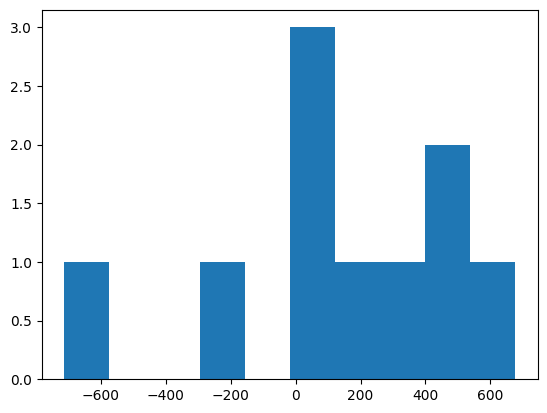

In [ ]:
from matplotlib import pyplot as plt

plt.hist(lr.coef_);

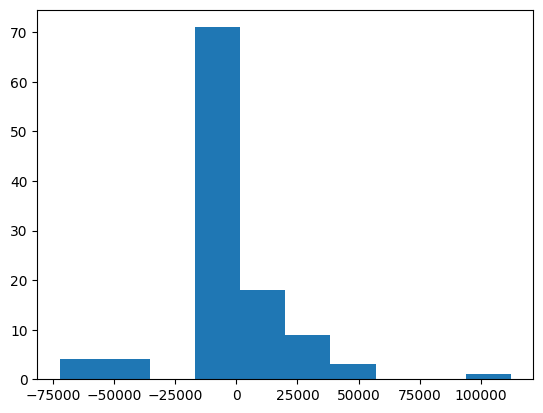

In [ ]:
plt.hist(lr2.coef_);

Обучим линейную регрессию с L1-регуляризацией для разных значений коэффициента регуляризации alpha.

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso
import numpy as np

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(lasso.coef_,'\n')

alpha=1e-05
Train MSE: 2214.2003257814154
Test MSE: 3682.6771766438833
[ 3.27206508e+01 -2.58927411e+02  5.02587438e+02  3.54354009e+02
 -1.64220661e+02 -1.92122282e+01 -1.89522360e+02  9.63952626e+01
  5.48800752e+02  1.11219935e+02  1.97027832e+03  4.52101687e+03
  3.30676701e+02 -4.40083143e+02 -1.06907751e+03 -2.98453030e+03
  1.93186767e+03  1.18645207e+03  1.51892555e+03  2.64894146e+03
  1.87553704e+02 -0.00000000e+00  1.13316117e+03  1.71492560e+03
  3.47912051e+03 -8.42718781e+03 -0.00000000e+00 -3.77400170e+03
 -0.00000000e+00  1.23938095e+01  1.30127538e+02  1.88261940e+03
  6.90894291e+00  3.91701380e+03 -2.84233562e+03  0.00000000e+00
 -0.00000000e+00 -5.42458721e+03  1.25163420e+01 -0.00000000e+00
 -5.99305929e+02  7.65519631e+02  1.27188863e+03 -1.70614358e+03
  4.15262131e+03 -3.95631156e+03  1.01680030e+03  3.17717581e+02
  0.00000000e+00 -1.17822098e+03 -0.00000000e+00  9.74376077e+03
 -3.67741643e+02  1.02681002e+03  6.02644060e+03 -5.17608061e+03
 -1.07341576e+04 -2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+05, tolerance: 1.906e+02
  model = cd_fast.enet_coordinate_descent(


Обучим линейную регрессию с L2-регуляризацией для разных значений коэффициента регуляризации alpha.

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(ridge.coef_,'\n')

alpha=1e-05
Train MSE: 2228.516978365738
Test MSE: 3599.216553829915
[ 2.97870293e+01 -2.61341540e+02  4.99381130e+02  3.50960002e+02
 -3.10876390e+03  2.56925903e+03  9.20261948e+02  1.07795034e+02
  1.53107157e+03  1.08923874e+02  2.06983781e+03  2.24480297e+03
  1.56184248e+02 -4.58985234e+02 -1.55698690e+01 -1.89817091e+03
  1.15767286e+03  4.60588345e+02  7.49478859e+02  1.32524200e+03
  2.24480297e+03 -1.57810625e+00  1.50855089e+03  1.23676628e+03
  4.02901844e+03 -3.66993626e+03 -2.00897472e+02 -1.58052454e+03
 -1.30001733e+03 -4.24047622e+01  1.56184248e+02  1.50855089e+03
 -1.14430049e+02  2.59664770e+03 -2.12208495e+02  2.70726677e+03
 -1.45743347e+03 -2.76359153e+03 -3.55146870e+02 -1.99535488e+02
 -4.58985234e+02  1.23676628e+03  2.59664770e+03 -1.72607995e+03
  1.33302626e+03 -1.73579237e+03  9.02342421e+02  8.79158410e+02
  1.44904357e+02 -9.76888734e+02 -1.55698690e+01  4.02901844e+03
 -2.12208495e+02  1.33302626e+03  2.66264515e+03  1.36983414e+03
 -3.04512233e+03 -5.6